# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

OBSERVABLE TRENDS

1. The total number of cities randomly generated was not evenly distributed between the northern and southern hemispheres. There were 594 cities generated in total and the distribution is: 417 cities for the northern hemisphere and 177 cities for the southern hemisphere.

2. The linear regression model for latitude and max temeprature showed some good observeable linear trend for both the northern and southern hemispheres; i.e., there is an increase in the cities' max temp as the latitude location of the cities are closer to latitude 0, which is the equator. However, the coefficient of determination for both the northern and southern hemispheres gave values less than 0.9, which indicated that the regression model cannot be used for predicting the max temperature for a city based on the city's latitude location.

3. The other parameters determined such as humidity, cloudiness and wind speed did not show any correlation with the latitude locations of the cities in the dataset. The calculated coefficient of determination (r2) for all plots indicated that the regression models generated for each plot of latitude vs humidity, cloudiness and wind speed are not reliable.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)       # merges the two; groups into pairs based on order

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:      # proceed with one pair at a time
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name   # look for the city with thd lat and lng
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Declare city data

city_data = []

# Set the counter

record_counter = 1
set_counter = 1

# Starting URL for Weather Map API Call

url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key


print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_counter += 1
        record_counter = 1
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_counter, set_counter, city))

    # Add 1 to the record counter
    record_counter += 1
    
    try:
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
                
        city_data.append({"City": city.title(),
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass

print('-----------------------')
print('Data Retrieval Complete')
print('-----------------------')
    

------------------------
Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 1 | xining
Processing Record 3 of Set 1 | grand centre
City not found. Skipping...
Processing Record 4 of Set 1 | ponta do sol
Processing Record 5 of Set 1 | broome
Processing Record 6 of Set 1 | soyo
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | sorland
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | san carlos de bariloche
Processing Record 13 of Set 1 | pedro carbo
Processing Record 14 of Set 1 | ambon
Processing Record 15 of Set 1 | kankon
Processing Record 16 of Set 1 | katsuura
Processing Record 17 of Set 1 | pacific grove
Processing Record 18 of Set 1 | talcahuano
Processing Record 19 of Set 1 | itarema
Processing Record 20 of Set 1 | yellowknife
Proc

Processing Record 39 of Set 4 | tukrah
Processing Record 40 of Set 4 | barrow
Processing Record 41 of Set 4 | yerbogachen
Processing Record 42 of Set 4 | hede
Processing Record 43 of Set 4 | lorengau
Processing Record 44 of Set 4 | giyon
Processing Record 45 of Set 4 | bushehr
Processing Record 46 of Set 4 | manuk mangkaw
Processing Record 47 of Set 4 | padang
Processing Record 48 of Set 4 | prince rupert
Processing Record 49 of Set 4 | saleaula
City not found. Skipping...
Processing Record 50 of Set 4 | bonavista
Processing Record 1 of Set 5 | mercedes
Processing Record 2 of Set 5 | khani
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | faanui
Processing Record 5 of Set 5 | clyde river
Processing Record 6 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 7 of Set 5 | meyungs
City not found. Skipping...
Processing Record 8 of Set 5 | ransang
Processing Record 9 of Set 5 | kununurra
Processing Record 10 of Set 5 | moron
Processing Record 11 of Set

Processing Record 29 of Set 8 | san luis
Processing Record 30 of Set 8 | havelock
Processing Record 31 of Set 8 | tsogni
Processing Record 32 of Set 8 | coquimbo
Processing Record 33 of Set 8 | angoche
Processing Record 34 of Set 8 | barra patuca
Processing Record 35 of Set 8 | beira
Processing Record 36 of Set 8 | veinticinco de mayo
Processing Record 37 of Set 8 | leh
Processing Record 38 of Set 8 | alyangula
Processing Record 39 of Set 8 | tigil
Processing Record 40 of Set 8 | tagusao
Processing Record 41 of Set 8 | krasnystaw
Processing Record 42 of Set 8 | rondonopolis
Processing Record 43 of Set 8 | kavieng
Processing Record 44 of Set 8 | the pas
Processing Record 45 of Set 8 | ranfurly
Processing Record 46 of Set 8 | kosh-agach
Processing Record 47 of Set 8 | suna
Processing Record 48 of Set 8 | rakoshyno
Processing Record 49 of Set 8 | kichera
Processing Record 50 of Set 8 | nome
Processing Record 1 of Set 9 | marsa matruh
Processing Record 2 of Set 9 | katobu
Processing Record

Processing Record 20 of Set 12 | saint combs
City not found. Skipping...
Processing Record 21 of Set 12 | praia
Processing Record 22 of Set 12 | chupei
City not found. Skipping...
Processing Record 23 of Set 12 | fort wellington
Processing Record 24 of Set 12 | santiago del estero
Processing Record 25 of Set 12 | inderborskiy
City not found. Skipping...
Processing Record 26 of Set 12 | chimbote
Processing Record 27 of Set 12 | richmond
Processing Record 28 of Set 12 | boden
Processing Record 29 of Set 12 | bozoum
Processing Record 30 of Set 12 | burns lake
Processing Record 31 of Set 12 | povenets
Processing Record 32 of Set 12 | menongue
Processing Record 33 of Set 12 | tikapur
Processing Record 34 of Set 12 | fare
Processing Record 35 of Set 12 | moultrie
Processing Record 36 of Set 12 | north bend
Processing Record 37 of Set 12 | havoysund
Processing Record 38 of Set 12 | marystown
Processing Record 39 of Set 12 | kabompo
Processing Record 40 of Set 12 | honningsvag
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a data frame

city_df = pd.DataFrame(city_data)
city_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Xining,36.6167,101.7667,18.32,54,75,0.96,CN,1663390824
1,Ponta Do Sol,32.6667,-17.1000,23.17,74,21,4.21,PT,1663390994
2,Broome,42.2506,-75.8330,15.47,87,100,1.54,US,1663390994
3,Soyo,-6.1349,12.3689,22.74,90,82,2.60,AO,1663390995
4,Rikitea,-23.1203,-134.9692,22.53,73,0,7.75,PF,1663390995


In [8]:
# Output File (CSV)

city_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [9]:
# Create a summary statistics

city_df.describe()  

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,5.940000e+02
mean,20.717019,15.151277,18.356717,72.540404,59.558923,3.662542,1.663391e+09
std,33.179657,88.969649,8.299231,19.921242,38.791361,2.730631,7.618276e+01
min,-54.800000,-179.166700,-3.590000,1.000000,0.000000,0.000000,1.663391e+09
25%,-5.117750,-62.900925,11.692500,62.000000,20.000000,1.630000,1.663391e+09
50%,25.822250,21.952450,19.010000,77.000000,73.000000,3.170000,1.663391e+09
75%,48.429775,87.616850,24.952500,87.000000,99.000000,4.807500,1.663391e+09
max,78.218600,179.316700,37.990000,100.000000,100.000000,16.460000,1.663391e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#  Get the indices of cities that have humidity over 100%.

city_df.sort_values("Humidity", ascending=False)

# THERE ARE NO CITIES WITH HUMDITY > 100%!

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
518,Luanda,-8.8368,13.2343,20.00,100,75,0.51,AO,1663391140
511,Hammerfest,70.6634,23.6821,7.25,100,100,6.69,NO,1663391137
135,Vyartsilya,62.1764,30.6930,10.34,100,92,2.68,RU,1663391031
265,Valparaiso,-33.0393,-71.6273,13.33,100,100,2.26,CL,1663391067
264,Kuusamo,65.9667,29.1833,9.02,100,100,3.60,FI,1663391067
...,...,...,...,...,...,...,...,...,...
332,Port Hedland,-20.3167,118.5667,34.03,10,32,4.12,AU,1663390822
561,Tabas,33.5959,56.9244,30.12,10,0,0.46,IR,1663391154
590,Dehloran,32.6941,47.2679,33.75,10,0,0.21,IR,1663391161
194,Kununurra,-15.7667,128.7333,37.99,8,40,3.60,AU,1663391047


THERE ARE NO CITIES WITH HUMIDITY > 100%!

## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

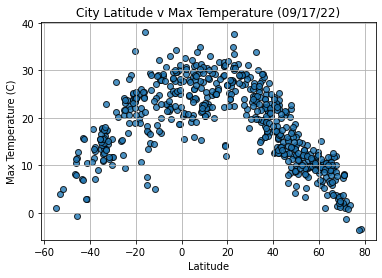

In [61]:

plt.scatter(city_df["Lat"], city_df["Max Temp"], edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

plt.title(f"City Latitude v Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

plt.savefig("output_data/Fig1.png")
plt.show()



The plot of Latitude vs Max Temperature shows that max temperature of a city is dependent on its latitude position. Cities furthest from latitude 0, which is the equator, will have lower max temp. 


## Latitude vs. Humidity Plot

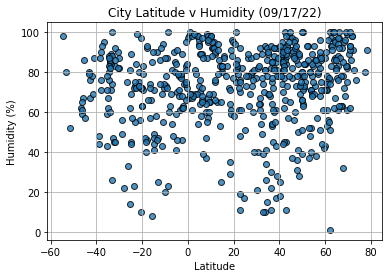

In [20]:

plt.scatter(city_df["Lat"], city_df["Humidity"], edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

plt.title(f"City Latitude v Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("output_data/Fig2.png")
plt.show()



The plot of Latitude vs Humidity shows that humidity is not dependent on the cities' latitude position. Majority of the cities in the dataset has humidity geater than 50% as shown by the greater number of markers above 50% humdity mark on the y-axis.


## Latitude vs. Cloudiness Plot

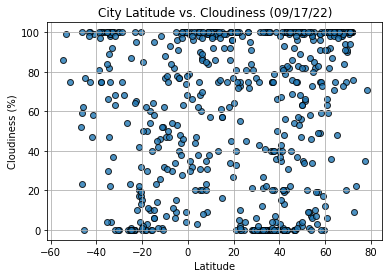

In [22]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("output_data/Fig3.png")
plt.show()



The plot of Latitude vs Cloudiness shows that cloudiness is not dependent on the cities' latitude position. The markers in the plot show random distribution of cloudiness for this dataset.


## Latitude vs. Wind Speed Plot

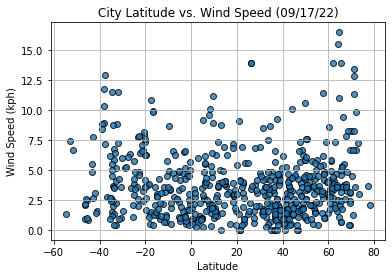

In [68]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph)")
plt.grid(True)

plt.savefig("output_data/Fig4.png")
plt.show()


The plot of Latitude vs Wind Speed shows that majority of the cities in the data set has wind speed less than 5 kph. The plot also shows that wind speed is not dependent on the cities' latitude position. 


## Linear Regression

In [46]:
# Determine total number of cities in data frame

city_df_count = len(city_df)
city_df_count

594

In [43]:
# Create Northern and Southern Hemisphere DataFrames

# Get a subset of all the cities that are above the equator for the Northern Hemisphere DataFrame; that is, latitude > 0.

northern_hemisphere = city_df.loc[city_df["Lat"] > 0]
northern_cities_count = len(northern_hemisphere)
northern_cities_count


417

In [45]:
# Get a subset of all the cities that are below the equator for the Southern Hemisphere DataFrame; that is, latitude < 0.

southern_hemisphere = city_df.loc[city_df["Lat"] < 0]
southern_cities_count = len(southern_hemisphere)
southern_cities_count

177

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7035900159094916


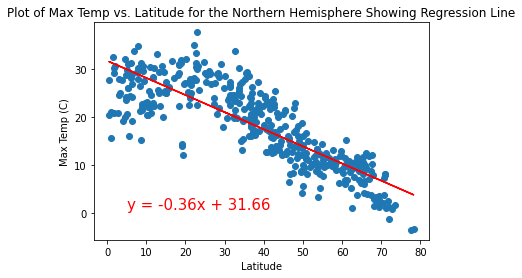

In [118]:
# Add the linear regression equation and line to plot

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.0,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Plot of Max Temp vs. Latitude for the Northern Hemisphere Showing Regression Line")
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5355685975433717


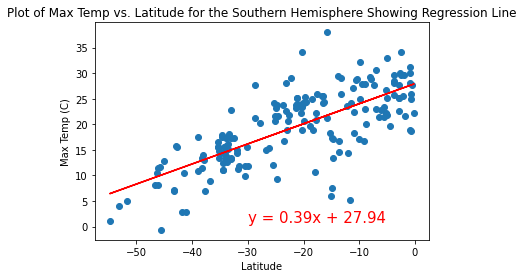

In [119]:
# Add the linear regression equation and line to plot

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Plot of Max Temp vs. Latitude for the Southern Hemisphere Showing Regression Line")
print(f"The r-squared is: {rvalue**2}")
plt.show()


Max Temperature

The plots of Latitude vs Max Temperature for cities in the northern and southern hemispheres confirm the trend observed in the plot of Latitude vs Max Temperature for all cities in the dataset. For cities in the northern hemisphere, i.e., latitude > 0, the slope is negative (slope = -0.36) that indicates a decreasing trend in max temperature as the latitude moves closer to 0.  On the other hand, for cities in the southern hemisphere, the slope is positive (slope = 0.39) that indicates an increasing trend in max temperature as the latitude moves further away from 0. 
The coefficient of determination (r2) for the plots of Latitude vs Max Temperature for cities in the northern and southern hemispheres are 0.7 and 0.5, respectively.These r2 values indicate that although there is a trend observed, the regression model cannot be used to predict the max temperature for other cities.


### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0034155360918922983


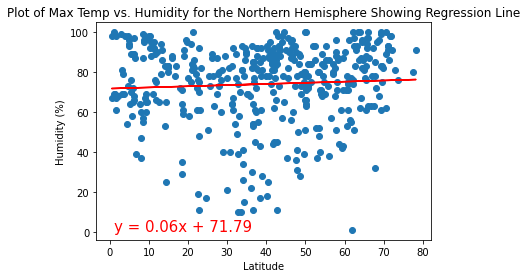

In [120]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1.0,0.5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Plot of Max Temp vs. Humidity for the Northern Hemisphere Showing Regression Line")
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.002674274389418984


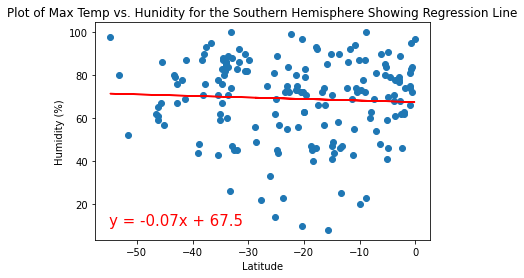

In [121]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55.0,10.0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Plot of Max Temp vs. Hunidity for the Southern Hemisphere Showing Regression Line")
print(f"The r-squared is: {rvalue**2}")
plt.show()


Humidity

The plots of Latitude vs Humidity for cities in the northern and southern hemispheres do not show a trend for cities in different latitude loctions. Although the regression analysis gave a positive slope for the northern hemisphere and negative slope for the southern hemisphere the absolute values are less than 0.1 (slope = 0.06 and -0.07, respectively), which do not give a good indication of a trend. 
The coefficient of determination for both plots also indicated that this regression models are not reliable.


### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.009152478640499761


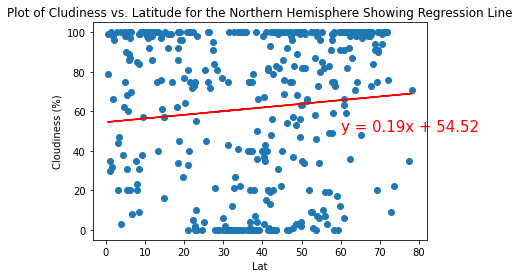

In [122]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60.0,50.0),fontsize=15,color="red")
plt.xlabel("Lat")
plt.ylabel("Cloudiness (%)")
plt.title("Plot of Cludiness vs. Latitude for the Northern Hemisphere Showing Regression Line")
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.035044228778456775


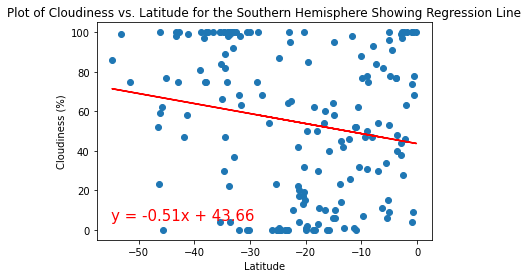

In [123]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55.0,5.0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Plot of Cloudiness vs. Latitude for the Southern Hemisphere Showing Regression Line")
print(f"The r-squared is: {rvalue**2}")
plt.show()


Cloudiness

The plot of Latitude vs Cloudiness for cities in the northern hemisphere shows an increasing trend in cloudiness as the city location gets further from latitude 0 as indicated by the positive slope (slope = 0.19), although this is a slow increase in cloudiness. In contrast, cloudiness in the cities in the southern hemisphere follows the opposite trend; cloudiness decreases as the city location gets closer to latitude 0, with a negative slope of -0.51. However, the plots show that cloudiness is randomly distributed in the plot, whereby for the majority of the cities, the distance of each city from the regression line is far.
The coefficient of determination for both plots also indicated that this regression models are not reliable.


####  Northern Hemisphere - Wind Speed (kph) vs. Latitude Linear Regression

The r-squared is: 0.03100114908928692


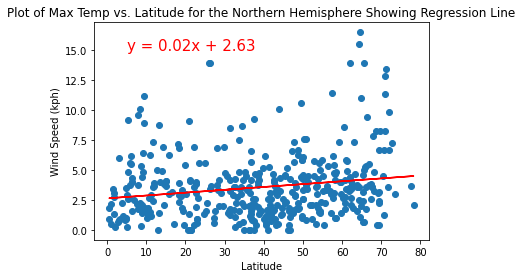

In [124]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.0,15.0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph)")
plt.title("Plot of Max Temp vs. Latitude for the Northern Hemisphere Showing Regression Line")
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Wind Speed (kph) vs. Latitude Linear Regression

The r-squared is: 0.0443449314880723


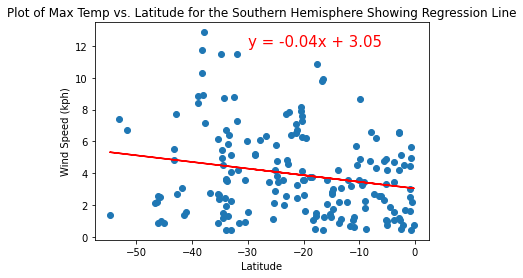

In [125]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30.0,12.0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph)")
plt.title("Plot of Max Temp vs. Latitude for the Southern Hemisphere Showing Regression Line")
print(f"The r-squared is: {rvalue**2}")
plt.show()


Wind Speed

The plots of Latitude vs Wind Speed for cities in the northern and southern hemispheres show a similar trend to the plot of Latitude vs Wind Speed. Similarly, the coefficient of determination for both plots also indicated that this regression models are not reliable.
